## Exercises

The end result of this exercise should be a file named prepare.py.

Using your store items data:

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire
import requests

In [ ]:
# df = acquire.get_sales_data()

In [228]:
df = pd.read_csv('store_item_sales.csv')

In [229]:
df.head()

,Unnamed: 0,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [230]:
df = df.drop(columns='Unnamed: 0')

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ MB


In [232]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')

In [233]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')

In [234]:
df = df.set_index('sale_date').sort_index()

In [235]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221


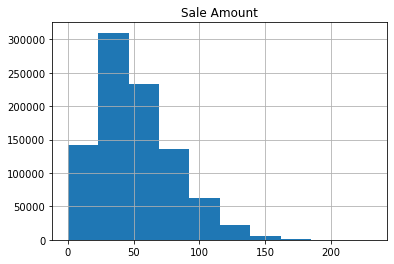

In [284]:
df.sale_amount.hist()
plt.title('Sale Amount')
plt.show()

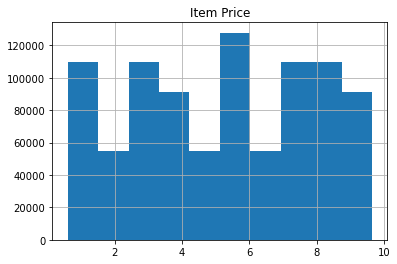

In [285]:
df.item_price.hist()
plt.title('Item Price')
plt.show()

In [238]:
df['month'] = df.index.month_name()

In [239]:
df

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221,December
2017-12-31,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231,December
2017-12-31,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,December


In [240]:
df['day'] = df.index.day_name()

In [241]:
df

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221,December,Sunday
2017-12-31,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231,December,Sunday
2017-12-31,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,December,Sunday


In [242]:
df['sales_total'] = df.item_price * df.sale_amount

In [243]:
df

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221,December,Sunday,87.57
2017-12-31,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231,December,Sunday,133.44
2017-12-31,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,December,Sunday,285.45


In [244]:
def prep_data(df):
    df = df.drop(columns='Unnamed: 0')
    df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    df = df.set_index('sale_date').sort_index()
    df['month'] = df.index.month_name()
    df['day'] = df.index.day_name()
    df['sales_total'] = df.item_price * df.sale_amount
    return df

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [245]:
ops = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [246]:
ops

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [247]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


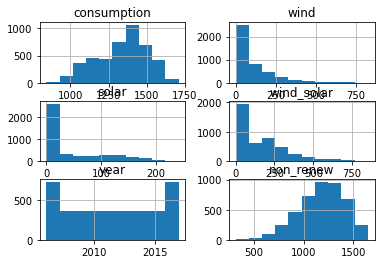

In [290]:
ops.hist()
plt.show()

In [249]:
ops.Date = pd.to_datetime(ops.Date)

In [250]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [251]:
ops = ops.set_index('Date').sort_index()

In [252]:
ops.columns = ops.columns.str.lower().str.replace('+', '_')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_3994/2703688167.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ops.columns = ops.columns.str.lower().str.replace('+', '_')


In [253]:
ops.head()

,consumption,wind,solar,wind_solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [254]:
ops['month'] = ops.index.month_name()

In [255]:
ops['year'] = ops.index.year

In [256]:
ops.head()

,consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


In [257]:
ops['wind_solar'] = ops.wind + ops.solar

In [259]:
ops.groupby('month').wind.mean()

month
April        148.644725
August       109.350778
December     277.566526
February     206.942903
January      207.716480
July         112.376440
June         114.812058
March        174.218785
May          129.161601
November     198.934117
October      172.314177
September    127.731125
Name: wind, dtype: float64

In [260]:
ops['non_renew'] = ops.consumption - ops['wind_solar']

In [261]:
ops

,consumption,wind,solar,wind_solar,month,year,non_renew
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January,2006,NaN
2006-01-02,1380.52100,NaN,NaN,NaN,January,2006,NaN
2006-01-03,1442.53300,NaN,NaN,NaN,January,2006,NaN
2006-01-04,1457.21700,NaN,NaN,NaN,January,2006,NaN
2006-01-05,1477.13100,NaN,NaN,NaN,January,2006,NaN
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017,680.95653


<AxesSubplot:xlabel='Date'>

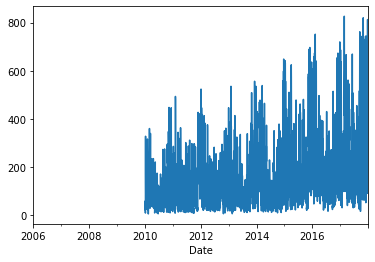

In [262]:
ops.wind.plot()

<AxesSubplot:xlabel='Date'>

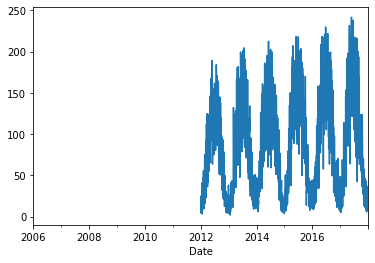

In [263]:
ops.solar.plot()

<AxesSubplot:xlabel='Date'>

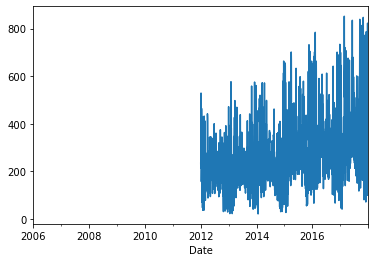

In [264]:
ops['wind_solar'].plot()

In [265]:
ops.solar = ops.solar.fillna(0)

In [266]:
ops['wind_solar'] = ops.wind + ops.solar
ops

,consumption,wind,solar,wind_solar,month,year,non_renew
Date,,,,,,,
2006-01-01,1069.18400,NaN,0.000,NaN,January,2006,NaN
2006-01-02,1380.52100,NaN,0.000,NaN,January,2006,NaN
2006-01-03,1442.53300,NaN,0.000,NaN,January,2006,NaN
2006-01-04,1457.21700,NaN,0.000,NaN,January,2006,NaN
2006-01-05,1477.13100,NaN,0.000,NaN,January,2006,NaN
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017,680.95653


In [267]:
ops['wind_solar'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Series name: wind_solar
Non-Null Count  Dtype  
--------------  -----  
2920 non-null   float64
dtypes: float64(1)
memory usage: 68.5 KB


In [268]:
ops.wind = ops.wind.fillna(0)

In [269]:
ops['wind_solar'] = ops.wind + ops.solar
ops

,consumption,wind,solar,wind_solar,month,year,non_renew
Date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006,NaN
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006,NaN
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006,NaN
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006,NaN
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006,NaN
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017,680.95653


In [270]:
ops.non_renew = ops.consumption - ops.wind_solar

In [271]:
ops

,consumption,wind,solar,wind_solar,month,year,non_renew
Date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006,1069.18400
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006,1380.52100
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006,1442.53300
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006,1457.21700
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006,1477.13100
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017,680.95653


<AxesSubplot:xlabel='Date'>

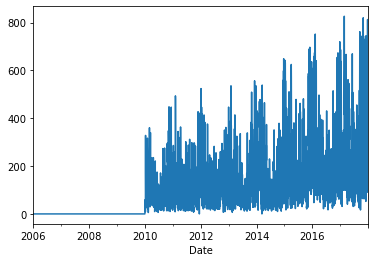

In [272]:
ops.wind.plot()

<AxesSubplot:xlabel='Date'>

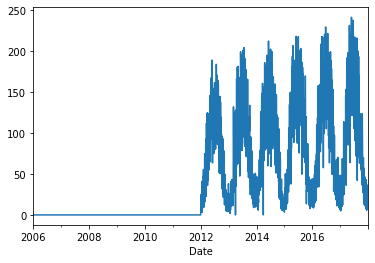

In [273]:
ops.solar.plot()

<AxesSubplot:xlabel='Date'>

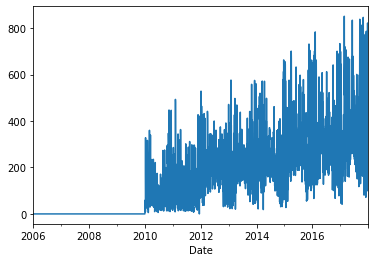

In [274]:
ops['wind_solar'].plot()

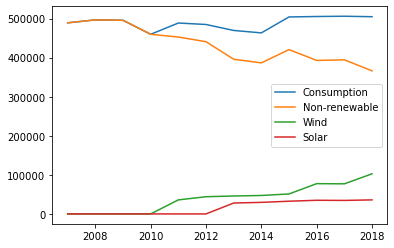

In [275]:
plt.plot(ops.consumption.resample('Y').sum(), label='Consumption')
plt.plot(ops.non_renew.resample('Y').sum(), label='Non-renewable')
plt.plot(ops.wind.resample('Y').sum(), label='Wind')
plt.plot(ops.solar.resample('Y').sum(), label='Solar')
plt.legend()

<AxesSubplot:xlabel='Date'>

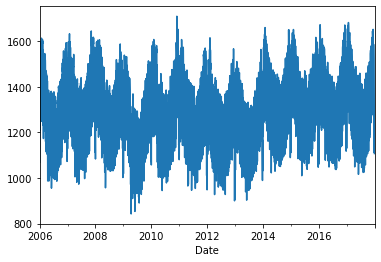

In [276]:
ops.consumption.plot()

In [277]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
 6   non_renew    4383 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 273.9+ KB


In [278]:
def prep_ops():
    '''This function pulls the opsd_germany csv from an html address and saves it to a variable as a dataframe.
    The dataframe is cleaned by making column names python-friendly and setting and sorting the date as the index.
    Three new columns are added: non_renew, month and year. The values for wind and solar are added together and 
    saved to the wind_solar column. The solar column nulls are filled with 0 first since the values started later
    in time, indicating that solar energy was available after wind energy. Wind energy nulls are filled with 0 and
    the two columns are added again and saved to wind_solar. This effectively handles all null values. The function
    returns the prepared dataframe.'''
    # pull the csv from the website and save to a variable
    ops = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
    # covert column names to all lower case and replace the + symbol with _
    ops.columns = ops.columns.str.lower().str.replace('+', '_')
    # convert the date column to datetime format
    ops.date = pd.to_datetime(ops.date)
    # set the date column as the index and sort
    ops = ops.set_index('date').sort_index()
    # add a column for the month with the month name of each observation (string)
    ops['month'] = ops.index.month_name()
    # add a column for the year with the year of each observation (int)
    ops['year'] = ops.index.year
    # add the wind and solar columns and save the values to wind_solar
    ops['wind_solar'] = ops.wind + ops.solar
    # add a column for non-renewable consumption, calculated by subtracting wind_solar from consumption
    ops['non_renew'] = ops.consumption - ops['wind_solar']
    # fill the null values in the solar column with 0
    ops.solar = ops.solar.fillna(0)
    # add the wind_solar values again now that solar nulls have been filled
    ops['wind_solar'] = ops.wind + ops.solar
    # fill the null values in the wind column with 0
    ops.wind = ops.wind.fillna(0)
    # add the wind_solar values again; this should remove any remaining nulls
    ops['wind_solar'] = ops.wind + ops.solar
    # calculate the non-renewable consumption again and save to a variable
    ops.non_renew = ops.consumption - ops.wind_solar
    # return the prepared dataframe
    return ops

In [279]:
ops = prep_ops()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_3994/930796590.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ops.columns = ops.columns.str.lower().str.replace('+', '_')


In [280]:
ops

,consumption,wind,solar,wind_solar,month,year,non_renew
date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006,1069.18400
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006,1380.52100
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006,1442.53300
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006,1457.21700
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006,1477.13100
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017,680.95653
